<a href="https://colab.research.google.com/github/swardiantara/fp-dm-2021/blob/main/LSTM_Glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Mount the G Drive to access the data set
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/Colab Notebooks/FP-DM/dataset/train.txt'
dev_path = '/content/drive/MyDrive/Colab Notebooks/FP-DM/dataset/dev.txt'
test_path = '/content/drive/MyDrive/Colab Notebooks/FP-DM/dataset/test.txt'
# dataset_path = 'dataset/train.txt'
data_train = []
with open(train_path) as fp:
  sentence = 1
  lines = fp.readlines()
  for line in lines:
    if (not line in ["\n", "\r\n"]):
      line_arr = line.split(' ')
      word = line_arr[0]
      pos = line_arr[1]
      tag = line_arr[2].strip()
      data_train.append([sentence, word, pos, tag])
    else:
      sentence += 1
data_train

[[1, 'Berikut', 'PROPN', 'O'],
 [1, 'adalah', 'AUX', 'O'],
 [1, 'tujuh', 'NUM', 'O'],
 [1, 'kota', 'NOUN', 'O'],
 [1, 'di', 'ADP', 'O'],
 [1, 'Indonesia', 'PROPN', 'B-LOC'],
 [1, 'yang', 'PRON', 'O'],
 [1, 'dianggap', 'VERB', 'O'],
 [1, 'paling', 'ADV', 'O'],
 [1, 'nyaman', 'ADJ', 'O'],
 [1, 'untuk', 'ADP', 'O'],
 [1, 'ditinggali', 'VERB', 'O'],
 [1, ':', 'PUNCT', 'O'],
 [2, 'Soal', 'PROPN', 'O'],
 [2, 'calon', 'NOUN', 'O'],
 [2, 'presiden', 'NOUN', 'O'],
 [2, 'itu', 'DET', 'O'],
 [2, 'urusan', 'NOUN', 'O'],
 [2, 'nanti', 'NOUN', 'O'],
 [2, ',', 'PUNCT', 'O'],
 [2, 'yang', 'PRON', 'O'],
 [2, 'penting', 'ADJ', 'O'],
 [2, 'menang', 'VERB', 'O'],
 [2, 'dulu', 'ADV', 'O'],
 [2, 'lah', 'PART', 'O'],
 [2, ',', 'PUNCT', 'O'],
 [2, 'kata', 'NOUN', 'O'],
 [2, 'Anis', 'PROPN', 'B-PER'],
 [2, 'di', 'ADP', 'O'],
 [2, 'Samarinda', 'PROPN', 'B-LOC'],
 [2, ',', 'PUNCT', 'O'],
 [2, 'Kalimantan', 'PROPN', 'B-LOC'],
 [2, 'Timur', 'PROPN', 'I-LOC'],
 [2, ',', 'PUNCT', 'O'],
 [2, 'Selasa', 'PROPN', 'O'],


In [4]:
data_dev = []
with open(dev_path) as fp:
  sentence = 1
  lines = fp.readlines()
  for line in lines:
    if (not line in ["\n", "\r\n"]):
      line_arr = line.split(' ')
      word = line_arr[0]
      pos = line_arr[1]
      tag = line_arr[2].strip()
      data_dev.append([sentence, word, pos, tag])
    else:
      sentence += 1
data_dev

[[1, 'Meski', 'SCONJ', 'O'],
 [1, 'demikian', 'ADV', 'O'],
 [1, ',', 'PUNCT', 'O'],
 [1, 'ia', 'PRON', 'O'],
 [1, 'menegaskan', 'VERB', 'O'],
 [1, 'dukungan', 'NOUN', 'O'],
 [1, 'tersebut', 'DET', 'O'],
 [1, 'belum', 'ADV', 'O'],
 [1, 'menjadi', 'VERB', 'O'],
 [1, 'penentu', 'NOUN', 'O'],
 [1, 'siapa', 'PRON', 'O'],
 [1, 'kandidat', 'NOUN', 'O'],
 [1, 'yang', 'PRON', 'O'],
 [1, 'bakal', 'ADV', 'O'],
 [1, 'lolos', 'ADJ', 'O'],
 [1, 'jadi', 'VERB', 'O'],
 [1, 'capres', 'NOUN', 'O'],
 [1, 'dari', 'ADP', 'O'],
 [1, 'PKB', 'PROPN', 'B-ORG'],
 [1, '.', 'PUNCT', 'O'],
 [2, 'Saya', 'PRON', 'O'],
 [2, 'menganjurkan', 'VERB', 'O'],
 [2, 'Prabowo', 'PROPN', 'B-PER'],
 [2, 'Subianto', 'PROPN', 'I-PER'],
 [2, '-', 'PUNCT', 'O'],
 [2, 'Hatta', 'PROPN', 'B-PER'],
 [2, 'Rajasa', 'PROPN', 'I-PER'],
 [2, 'mengeluarkan', 'VERB', 'O'],
 [2, 'pernyataan', 'NOUN', 'O'],
 [2, 'terbuka', 'VERB', 'O'],
 [2, 'untuk', 'ADP', 'O'],
 [2, 'menerima', 'VERB', 'O'],
 [2, 'keputusan', 'NOUN', 'O'],
 [2, 'MK', 'PROPN',

In [5]:
data_test = []
with open(test_path) as fp:
  sentence = 1
  lines = fp.readlines()
  for line in lines:
    if (not line in ["\n", "\r\n"]):
      line_arr = line.split(' ')
      word = line_arr[0]
      pos = line_arr[1]
      tag = line_arr[2].strip()
      data_test.append([sentence, word, pos, tag])
    else:
      sentence += 1
data_test

[[1, 'Presiden', 'PROPN', 'O'],
 [1, 'terpilih', 'VERB', 'O'],
 [1, 'Joko', 'PROPN', 'B-PER'],
 [1, 'Widodo', 'PROPN', 'I-PER'],
 [1, 'mengungkapkan', 'VERB', 'O'],
 [1, 'pihaknya', 'NOUN', 'O'],
 [1, 'tidak', 'PART', 'O'],
 [1, 'akan', 'ADV', 'O'],
 [1, 'membedakan', 'VERB', 'O'],
 [1, 'spesifikasi', 'NOUN', 'O'],
 [1, 'kandidat', 'NOUN', 'O'],
 [1, 'menteri', 'NOUN', 'O'],
 [1, 'yang', 'PRON', 'O'],
 [1, 'diusung', 'VERB', 'O'],
 [1, 'oleh', 'ADP', 'O'],
 [1, 'partai', 'NOUN', 'O'],
 [1, 'politik', 'NOUN', 'O'],
 [1, 'pengusung', 'NOUN', 'O'],
 [1, 'maupun', 'CCONJ', 'O'],
 [1, 'pendukung', 'NOUN', 'O'],
 [1, '.', 'PUNCT', 'O'],
 [2, 'Ya', 'PART', 'O'],
 [2, 'sama', 'ADV', 'O'],
 [2, 'dong', 'VERB', 'O'],
 [2, '.', 'PUNCT', 'O'],
 [2, 'Masak', 'PROPN', 'O'],
 [2, 'dibedakan', 'VERB', 'O'],
 [2, ',', 'PUNCT', 'O'],
 [2, 'ujar', 'NOUN', 'O'],
 [2, 'Joko', 'PROPN', 'B-PER'],
 [2, 'Widodo', 'PROPN', 'I-PER'],
 [2, 'atau', 'CCONJ', 'O'],
 [2, 'yang', 'PRON', 'O'],
 [2, 'karib', 'ADV', 'O'

In [6]:
data_traindf = pd.DataFrame(np.array(data_train), columns=["sentence #", "word", "pos", "tag"])
data_devdf = pd.DataFrame(np.array(data_dev), columns=["sentence #", "word", "pos", "tag"])
data_testdf = pd.DataFrame(np.array(data_test), columns=["sentence #", "word", "pos", "tag"])
data_merged = data_traindf.append([data_devdf, data_testdf])
data_testdf = data_testdf.append([data_devdf])

In [7]:
print("Train Shape : ", data_traindf.shape)
print("Test Shape : ", data_testdf.shape)
print("Merged Shape : ", data_merged.shape)

Train Shape :  (30248, 4)
Test Shape :  (18451, 4)
Merged Shape :  (48699, 4)


In [8]:
data_traindf["tag"].value_counts()

O        26728
B-PER      896
B-ORG      721
B-LOC      579
I-ORG      577
I-PER      486
I-LOC      261
Name: tag, dtype: int64

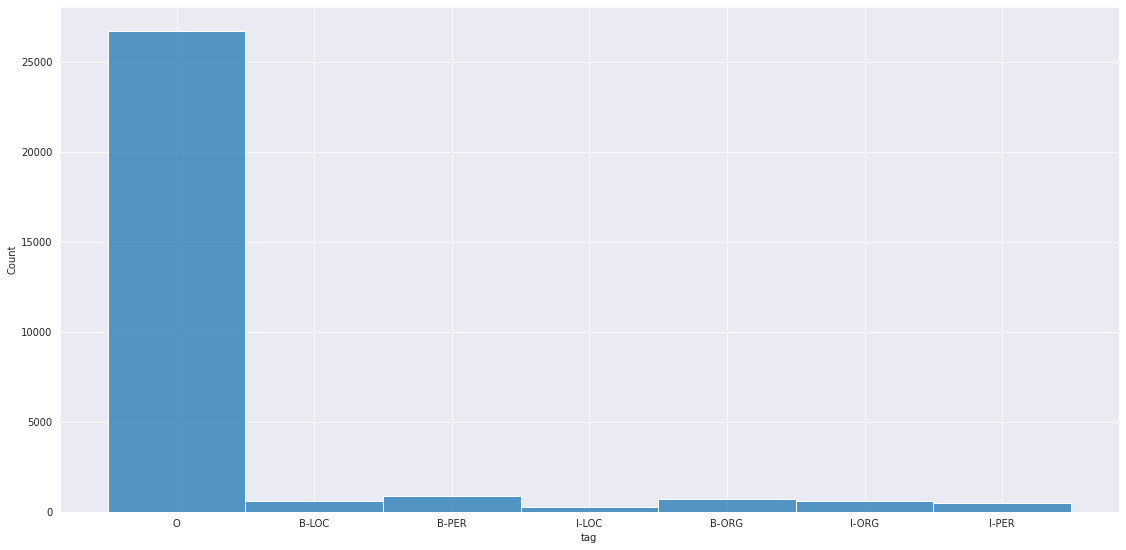

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16,8))
sns.set_style('darkgrid')
sns.histplot(data_traindf['tag'])
plt.tight_layout(pad=2)
plt.show()

In [10]:
from itertools import chain
def get_dict_map(data, token_or_tag):
    tok2idx = {}
    idx2tok = {}
    
    if token_or_tag == 'token':
        vocab = list(set(data['word'].to_list()))
    else:
        vocab = list(set(data['tag'].to_list()))
    
    idx2tok = {idx:tok for  idx, tok in enumerate(vocab)}
    tok2idx = {tok:idx for  idx, tok in enumerate(vocab)}
    return tok2idx, idx2tok, vocab

In [11]:
token2idx, idx2token, word_vocab = get_dict_map(data_merged, 'token')
tag2idx, idx2tag, tag_vocab = get_dict_map(data_merged, 'tag')
word_vocab.append("ENDPAD")

In [24]:
len(token2idx)

8542

In [12]:
data_traindf['word_idx'] = data_traindf['word'].map(token2idx)
data_traindf['tag_idx'] = data_traindf['tag'].map(tag2idx)
data_traindf_fillna = data_traindf.fillna(method='ffill', axis=0)

data_testdf['word_idx'] = data_testdf['word'].map(token2idx)
data_testdf['tag_idx'] = data_testdf['tag'].map(tag2idx)
data_testdf_fillna = data_testdf.fillna(method='ffill', axis=0)

data_merged['word_idx'] = data_merged['word'].map(token2idx)
data_merged['tag_idx'] = data_merged['tag'].map(tag2idx)
data_merged_fillna = data_merged.fillna(method='ffill', axis=0)

data_traindf_group = data_traindf_fillna.groupby(['sentence #'], as_index=False)['word', 'tag', 'word_idx', 'tag_idx'].agg(lambda x: list(x))
data_testdf_group = data_testdf_fillna.groupby(['sentence #'], as_index=False)['word', 'tag', 'word_idx', 'tag_idx'].agg(lambda x: list(x))
data_merged_group = data_merged_fillna.groupby(['sentence #'], as_index=False)['word', 'tag', 'word_idx', 'tag_idx'].agg(lambda x: list(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  from ipykernel import kernelapp as app


In [13]:
data_traindf_group.head()

,sentence #,word,tag,word_idx,tag_idx
0,1,"[Berikut, adalah, tujuh, kota, di, Indonesia, ...","[O, O, O, O, O, B-LOC, O, O, O, O, O, O, O]","[3925, 4302, 2851, 4739, 1393, 5167, 5145, 590...","[5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5]"
1,10,"[Siapapun, bisa, membantu, dengan, menyortir, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[5629, 2547, 285, 5309, 2534, 6724, 1345, 4134...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
2,100,"[Pak, Suhardi, berpantang, untuk, makan, gandu...","[O, B-PER, O, O, O, O, O, O, O, O, O, O, O, O,...","[6512, 2808, 5739, 2074, 2876, 5357, 2566, 166...","[5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
3,1000,"[Menurut, Rofikoh, ,, penilian, efesiensi, ini...","[O, B-PER, O, O, O, O, O, O, O, O, O]","[2413, 372, 2566, 3384, 567, 2863, 7834, 7486,...","[5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5]"
4,1001,"[Ini, tertulis, ,, bukan, hanya, tersirat, ,, ...","[O, O, O, O, O, O, O, O, O]","[3904, 144, 2566, 3385, 1342, 393, 2566, 6911,...","[5, 5, 5, 5, 5, 5, 5, 5, 5]"


In [14]:
maxlen_merged = max([len(s) for s in data_merged_group['word_idx'].tolist()])
maxlen_train = max([len(s) for s in data_traindf_group['word_idx'].tolist()])
maxlen_test = max([len(s) for s in data_testdf_group['word_idx'].tolist()])

In [15]:
print("Merged :", maxlen_merged)
print("Train :", maxlen_train)
print("Test :", maxlen_test)

Merged : 112
Train : 69
Test : 94


In [17]:
import numpy as np 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

def get_pad(dataset_grouped, word_vocab, tag_vocab, maxlen):

    #get max token and tag length
    n_token = len(word_vocab)
    n_tag = len(tag_vocab)

    #Pad tokens (X var)    
    tokens = dataset_grouped['word_idx'].tolist()
    # maxlen = max([len(s) for s in tokens])
    pad_tokens = pad_sequences(tokens, maxlen=maxlen, dtype='int32', padding='post', value= n_token - 1)

    #Pad Tags (y var) and convert it into one hot encoding
    tags = dataset_grouped['tag_idx'].tolist()
    pad_tags = pad_sequences(tags, maxlen=maxlen, dtype='int32', padding='post', value= tag2idx["O"])
    n_tags = len(tag2idx)
    pad_tags = [to_categorical(i, num_classes=n_tags) for i in pad_tags]
    
    # #Split train, test and validation set
    # tokens_, test_tokens, tags_, test_tags = train_test_split(pad_tokens, pad_tags, test_size=0.1, train_size=0.9, random_state=2020)
    # train_tokens, val_tokens, train_tags, val_tags = train_test_split(tokens_,tags_,test_size = 0.25,train_size =0.75, random_state=2020)

    # print(
    #     'train_tokens length:', len(train_tokens),
    #     '\ntrain_tags length:', len(train_tags),
    #     '\ntest_tokens length:', len(test_tokens),
    #     '\ntest_tags:', len(test_tags),
    #     '\nval_tokens:', len(val_tokens),
    #     '\nval_tags:', len(val_tags),
    # )
    
    return pad_tokens, pad_tags

In [18]:
train_tokens, train_tags = get_pad(data_traindf_group, word_vocab, tag_vocab, maxlen_merged)
test_tokens,  test_tags = get_pad(data_testdf_group, word_vocab, tag_vocab, maxlen_merged)
train_tags = np.array(train_tags)
test_tags = np.array(test_tags)
print('train_tags: ',train_tags.shape,'test_tags: ',test_tags.shape)

train_tags:  (1464, 112, 7) test_tags:  (509, 112, 7)


In [19]:
from sklearn.utils import class_weight

train_temp_tags = np.ravel(np.argmax(train_tags, axis=-1))
print(len(train_temp_tags))

163968


In [20]:
class_weights = class_weight.compute_class_weight(
    class_weight ='balanced', 
    classes = np.unique(train_temp_tags), 
    y = train_temp_tags
    )
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

train_label = np.argmax(train_tags, axis=-1)
print(train_tokens.shape)
print(train_label.shape)

{0: 32.488210818307905, 1: 26.142857142857142, 2: 89.74712643678161, 3: 48.19753086419753, 4: 40.4559585492228, 5: 0.14599122457120065, 6: 40.596187175043326}
(1464, 112)
(1464, 112)


In [21]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input
from tensorflow.keras.utils import plot_model

In [22]:
input_dim = len(word_vocab)+1
output_dim = 64
input_length = maxlen_merged
n_tags = len(tag2idx)

GloVe Embedding

In [34]:
! pip install glove-python-binary

     |████████████████████████████████| 948 kB 25.0 MB/s 


In [35]:
from glove import Corpus, Glove

In [36]:
glove_model = Glove.load('/content/drive/MyDrive/Colab Notebooks/FP-DM/models/word_embeddings/glove5_100.model')

In [37]:
embedding_matrix = np.zeros((len(token2idx) + 1, 100))
for word, i in token2idx.items():
  embedding_vector = glove_model.word_vectors[glove_model.dictionary[word]]
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [39]:
embedding_matrix.shape

(8543, 100)

In [40]:
embedding_layer = Embedding(len(token2idx) +1,
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=maxlen_merged,
                            trainable=False)

In [42]:
def get_bilstm_lstm_model():
    model = Sequential()
    model.add(embedding_layer)
    model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))
    model.add(LSTM(units=output_dim, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
    model.add((Dense(n_tags, activation="softmax")))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    return model

In [43]:
maj_index = tag2idx['O']

''' Change it More for Better Fine-Tuning '''

# class_weight_dict[maj_index] = 28.5277954105731576 
print(class_weight_dict)
sample_weights = np.ones(shape=(len(train_label), train_label.shape[-1]))
for i in range(17):
    sample_weights[train_label == i] = class_weight_dict.get(i)
print(sample_weights.shape)

{0: 32.488210818307905, 1: 26.142857142857142, 2: 89.74712643678161, 3: 48.19753086419753, 4: 40.4559585492228, 5: 0.14599122457120065, 6: 40.596187175043326}
(1464, 112)


In [44]:
import tensorflow as tf
nlp_model = get_bilstm_lstm_model()
plot_model(nlp_model)
his = nlp_model.fit(train_tokens, train_label , batch_size = 64, epochs=5, validation_split=0.2, sample_weight = sample_weights) 
tf.keras.models.save_model(nlp_model, filepath  = "/content/drive/MyDrive/Colab Notebooks/FP-DM/models/LSTM/lstm_glove.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 112, 100)          854300    
                                                                 
 bidirectional (Bidirectiona  (None, 112, 128)         84480     
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 112, 64)           49408     
                                                                 
 dense (Dense)               (None, 112, 7)            455       
                                                                 
Total params: 988,643
Trainable params: 134,343
Non-trainable params: 854,300
_________________________________________________________________
Epoch 1/5
19/19 [==============================] - 20s 656ms/step - loss: 1.8445 - accuracy: 0.4611 - val_loss

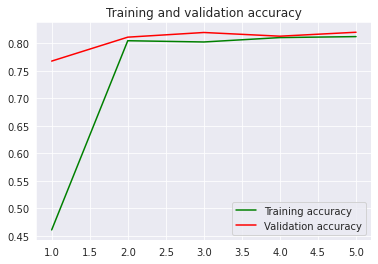

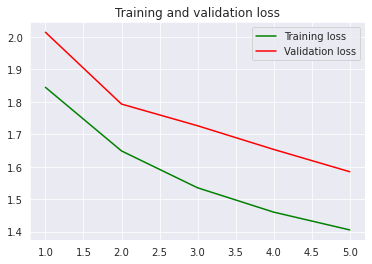

In [46]:
# Plot results
import matplotlib.pyplot as plt

accuracy = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']

epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [45]:
nlp_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/FP-DM/models/LSTM/lstm_glove.h5')

y_test = np.argmax(test_tags, axis=-1)
print(test_tokens.shape,y_test.shape)
nlp_model.evaluate(test_tokens, y_test)

(509, 112) (509, 112)
16/16 [==============================] - 2s 61ms/step - loss: 1.1477 - accuracy: 0.6857


[1.1476842164993286, 0.6856581568717957]

In [47]:
y_pred = nlp_model.predict(test_tokens)
y_pred = np.argmax(y_pred, axis=-1)

In [48]:
y_test_list = []
y_pred_list = []
for row in range(0, y_test.shape[0]):
  y_pred_list = np.concatenate((y_pred_list, y_pred[row]), axis=0)
  y_test_list = np.concatenate((y_test_list, y_test[row]), axis=0)
  # y_test_list = y_test_list + y_test[row]

In [49]:
data_prediction = pd.DataFrame({'actual_class': y_test_list, 'predicted_class': y_pred_list})
data_prediction['actual_class'] = data_prediction['actual_class'].map(idx2tag)
data_prediction['predicted_class'] = data_prediction['predicted_class'].map(idx2tag)

In [50]:
data_prediction

,actual_class,predicted_class
0,O,B-ORG
1,O,B-ORG
2,B-PER,B-ORG
3,I-PER,B-ORG
4,O,B-ORG
...,...,...
57003,O,O
57004,O,O
57005,O,O
57006,O,O


In [51]:
confusion_matrix = pd.crosstab(data_prediction['predicted_class'], data_prediction['actual_class'])
confusion_matrix

actual_class,B-LOC,B-ORG,B-PER,I-LOC,I-ORG,I-PER,O
predicted_class,,,,,,,
B-LOC,166,73,76,84,26,12,4157
B-ORG,9,176,186,4,58,41,4253
B-PER,32,49,195,16,6,28,2357
I-LOC,10,8,17,28,12,12,431
I-ORG,19,222,153,11,262,134,2738
I-PER,19,62,109,16,47,104,2432
O,0,0,0,0,0,1,38157


In [52]:
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(data_prediction['actual_class'], data_prediction['predicted_class'], output_dict=True)).T

,precision,recall,f1-score,support
B-LOC,0.036134,0.650980,0.068468,255.000000
B-ORG,0.037233,0.298305,0.066203,590.000000
B-PER,0.072680,0.264946,0.114068,736.000000
I-LOC,0.054054,0.176101,0.082718,159.000000
I-ORG,0.074032,0.637470,0.132658,411.000000
I-PER,0.037289,0.313253,0.066645,332.000000
O,0.999974,0.699807,0.823387,54525.000000
accuracy,0.685658,0.685658,0.685658,0.685658
macro avg,0.187342,0.434409,0.193450,57008.000000
weighted avg,0.958807,0.685658,0.791564,57008.000000
